<a href="https://colab.research.google.com/github/romulo-souza/Data_Mining/blob/main/SeriesTemporais/SeriesTemporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Séries Temporais
É um conjunto de dados ordenados no tempo, onde cada dado é registrado em um instante específico.

### Importando as bibliotecas necessárias

In [ ]:
import pandas as pd # para manipular os dados da série
from statsmodels.tsa.seasonal import seasonal_decompose # permite realizar a decomposição da série (biblioteca statsmodels)
import yfinance as yf # biblioteca yahoo finance por meio da qual serão coletados os dados

### Coletando os dados da série

In [ ]:
# coleta dados diários das ações da Petrobras listadas no índice Bovespa
ticket = yf.Ticker("PETR4.SA")
acao = ticket.history(interval = '1d', start = '2019-09-01', end = '2020-10-01') #função history retorna um DataFrame com o histórico de preços da ação (abertura, máx., mín., fechamento, volume, etc) (coleta de 01/09 até 30/09, não inclui dia 01/10)

In [ ]:
# visualizando os primeiros registros
acao.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-09-02 00:00:00-03:00,9.267776,9.337129,9.216674,9.234924,19049900,0.0,0.0
2019-09-03 00:00:00-03:00,9.165573,9.366332,9.136371,9.344431,47829600,0.0,0.0
2019-09-04 00:00:00-03:00,9.548840,9.625494,9.490437,9.585341,56179000,0.0,0.0
2019-09-05 00:00:00-03:00,9.709448,9.778802,9.614544,9.632794,48586800,0.0,0.0
2019-09-06 00:00:00-03:00,9.636444,9.804352,9.563441,9.680246,48502200,0.0,0.0


In [ ]:
# visualizando os últimos registros
acao.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-09-24 00:00:00-03:00,7.540089,7.715180,7.473033,7.599694,76310000,0.0,0.0
2020-09-25 00:00:00-03:00,7.506562,7.547541,7.402253,7.499111,40150400,0.0,0.0
2020-09-28 00:00:00-03:00,7.573618,7.659301,7.312844,7.312844,48797400,0.0,0.0
2020-09-29 00:00:00-03:00,7.312843,7.398527,7.171281,7.193633,52878100,0.0,0.0
2020-09-30 00:00:00-03:00,7.264415,7.465583,7.238337,7.305394,69505000,0.0,0.0


### Visualizando a Série

<Axes: xlabel='Date'>

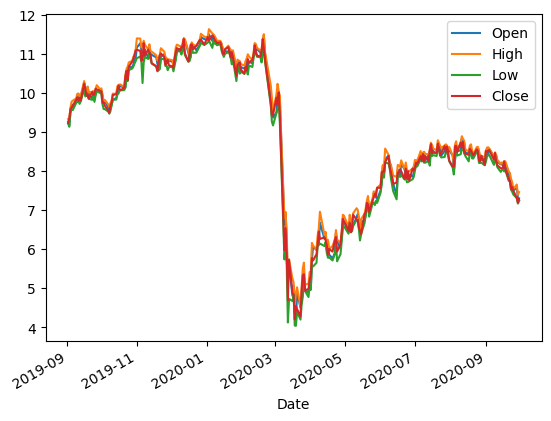

In [ ]:
# visualizar a série (multivariada)
acao[['Open','High','Low','Close']].plot() #seleciona os valores das colunas especificadas dentro dos colchetes

### Visualizando componentes da Série

In [ ]:
# para visualizar os componentes da série sobre os preços de fechamento é necessário realizar a decomposição
decomposicao = seasonal_decompose(acao['Close'], period=30, extrapolate_trend=30) #seasonal_decompose usa médias móveis para fazer a decomposição da série temporal nos componente "trend", "seasonal" e "resid". Periódo = 30 dias, pois interval = '1d'. Indica que o padrão sazonal se repete a cada 30 unidades de tempo.

<Axes: xlabel='Date'>

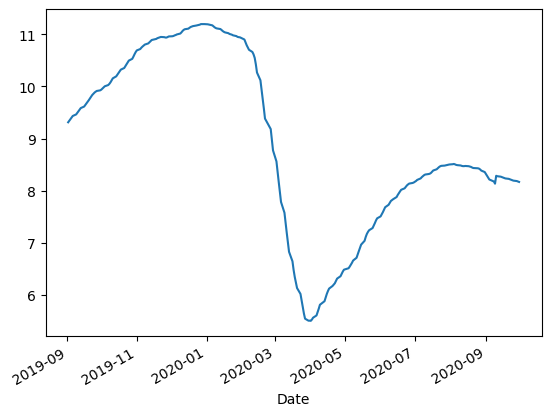

In [ ]:
# ilustra a tendência
decomposicao.trend.plot() #eixo x: tempo, eixo y: valor do preço de tendência

<Axes: xlabel='Date'>

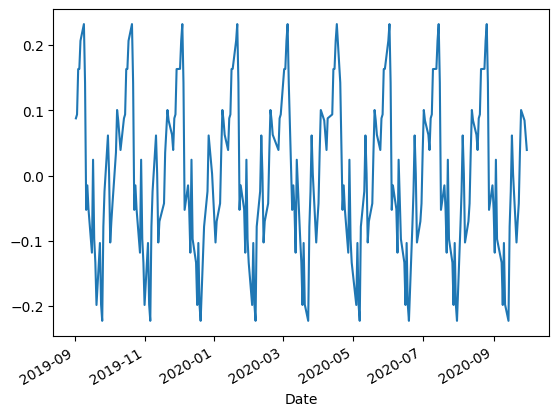

In [ ]:
# ilustra a sazonalidade
decomposicao.seasonal.plot() #eixo x: tempo, eixo y: sazonalidade (desvio médio, mostra o quanto os valores da série "sobe" ou "desce" da média geral em cada ponto do ciclo)

<Axes: xlabel='Date'>

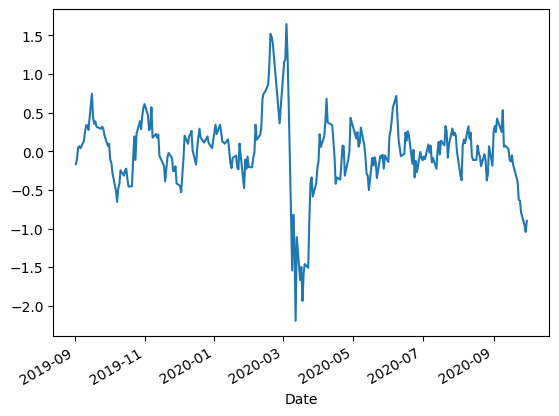

In [ ]:
# ilustra o ruído
decomposicao.resid.plot() #eixo x: tempo, eixo y: ruído (mostra o quanto os valores reais "fugiram" da tendência + sazonalidade) obs.: na decomposição aditiva -> valor real da série = tendência + sazonalidade + ruído